# Accept/Reject Sampling

This code implements accept/reject sampling and evaluates its performance on high dimensions 

In [3]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax
import jax.numpy as jnp
import jax.random as jr
import pylab as plt
import seaborn as sns

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.gaussian import IsotropicGauss
from mcjax.IS.AccRej import AccRej

In [4]:
# initialize jax RNG
key = jr.key(0)

### One dimension

In [24]:
# Sample one-dimension standard gaussian distribution
dim = 1
mu = np.zeros(dim)
sigma = 1.
log_var = jnp.log(sigma**2)
m = 2.**dim
target_dist = IsotropicGauss(mu=mu, log_var=log_var)
proposal_dist = IsotropicGauss(mu=mu, log_var=log_var)

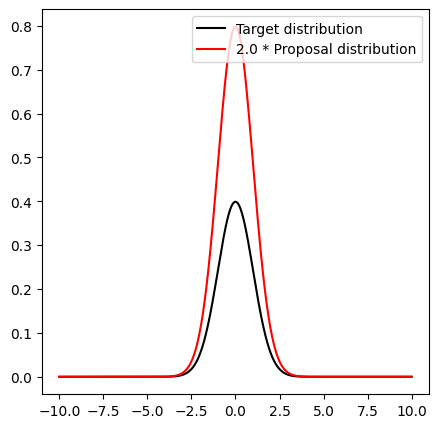

In [6]:
xmin, xmax = -10, 10
X = jnp.linspace(xmin,xmax,1000)
target_Z = jnp.exp(target_dist.batch(X[:,None]))
proposal_Z = jnp.exp(proposal_dist.batch(X[:,None]))*m
plt.figure(figsize=(5,5))
plt.plot(X, target_Z, color = 'black', label="Target distribution")
plt.plot(X, proposal_Z, color = 'red', label=f"{m:.1f} * Proposal distribution")
plt.legend(loc="upper right")


In [7]:
naive_sampling = AccRej(logtarget=target_dist)
dist_output = naive_sampling.run(key=key,n_iter=10_000,proposal=proposal_dist,m=m,verbose=False)


Text(2, 0.3, 'Acceptance rate:\n 50.02 %')

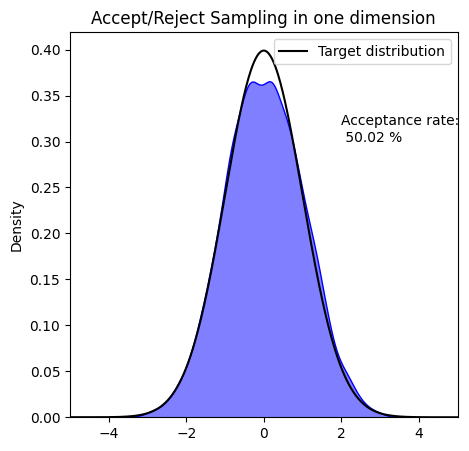

In [8]:
# draw the sampling result and acceptance rate
xmin, xmax = -10, 10
X = jnp.linspace(xmin,xmax,1000)
target_Z = jnp.exp(target_dist.batch(X[:,None]))
acc_rate = len(dist_output["acc_samples"])/len(dist_output["samples"])*100


plt.figure(figsize=(5,5))
plt.plot(X, target_Z, color = 'black', label="Target distribution")
plt.legend(loc="upper right")
acc_samples = [i.item() for i in dist_output["acc_samples"]]
sns.kdeplot(acc_samples, fill=True, color="blue", alpha=0.5)
plt.xlim(-5,5)
plt.title("Accept/Reject Sampling in one dimension")
plt.text(x=2, y = 0.3, s = f"Acceptance rate:\n {acc_rate:.2f} %")



### Dim = 2

In [25]:
# Sample two-dimension standard gaussian distribution
dim = 2
mu = np.zeros(dim)
sigma = 1.
log_var = jnp.log(sigma**2)
m = 2.**dim
target_dist = IsotropicGauss(mu=mu, log_var=log_var)
proposal_dist = IsotropicGauss(mu=mu, log_var=log_var)

(-5.0, 5.0)

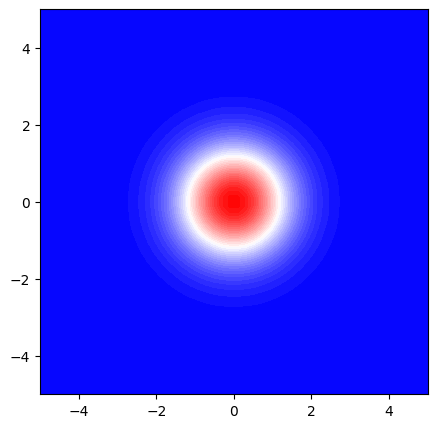

In [26]:
xmin, xmax = -10, 10
ymin, ymax = -10, 10
npts = 100
X, Y = np.meshgrid(np.linspace(xmin, xmax, npts), np.linspace(ymin, ymax, npts), indexing='ij')
X_flat = X.ravel()
Y_flat = Y.ravel()
XY = jnp.stack([X_flat, Y_flat], axis=-1)
target_Z = target_dist.batch(XY).reshape(X.shape)
proposal_Z = proposal_dist.batch(XY).reshape(X.shape)
plt.figure(figsize=(5,5))
plt.contourf(X, Y, jnp.exp(target_Z), levels=50, cmap='bwr')
plt.xlim(-5,5)
plt.ylim(-5,5)

In [27]:
naive_sampling = AccRej(logtarget=target_dist)
dist_output = naive_sampling.run(key=key,n_iter=10_000,proposal=proposal_dist,m=m,verbose=False)

Text(2, 4, 'Acceptance rate:\n 24.50 %')

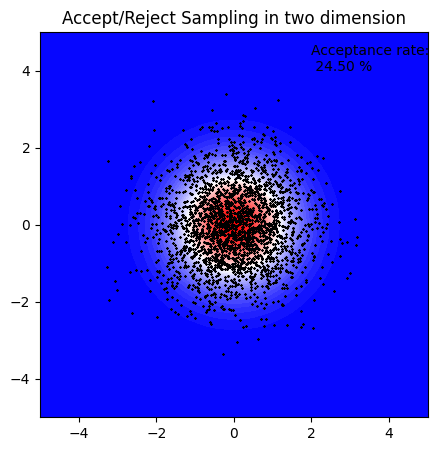

In [43]:
# draw the sampling result and acceptance rate
xmin, xmax = -10, 10
X = jnp.linspace(xmin,xmax,1000)
target_Z = jnp.exp(target_dist.batch(X[:,None]))
acc_rate = len(dist_output["acc_samples"])/len(dist_output["samples"])*100
acc_samples_x = [i[0][0] for i in dist_output["acc_samples"]];acc_samples_y = [i[0][1] for i in dist_output["acc_samples"]]

npts = 100
X, Y = np.meshgrid(np.linspace(xmin, xmax, npts), np.linspace(ymin, ymax, npts), indexing='ij')
X_flat = X.ravel()
Y_flat = Y.ravel()
XY = jnp.stack([X_flat, Y_flat], axis=-1)
target_Z = target_dist.batch(XY).reshape(X.shape)
proposal_Z = proposal_dist.batch(XY).reshape(X.shape)
plt.figure(figsize=(5,5))
plt.contourf(X, Y, jnp.exp(target_Z), levels=50, cmap='bwr')
plt.scatter(acc_samples_x, acc_samples_y, s=1, marker='x', color="black")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title("Accept/Reject Sampling in two dimension")
plt.text(x=2, y = 4, s = f"Acceptance rate:\n {acc_rate:.2f} %")

